### Importación de datos



In [9]:
import pandas as pd
import matplotlib.pyplot as plt

url_1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url_2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url_3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url_4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

store_1 = pd.read_csv(url_1)
store_2 = pd.read_csv(url_2)
store_3 = pd.read_csv(url_3)
store_4 = pd.read_csv(url_4)

store_1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Ingresos de las tiendas
    Tienda   Facturacion
0  Store_1  1.150880e+09
1  Store_2  1.116344e+09
2  Store_3  1.098020e+09
3  Store_4  1.038376e+09


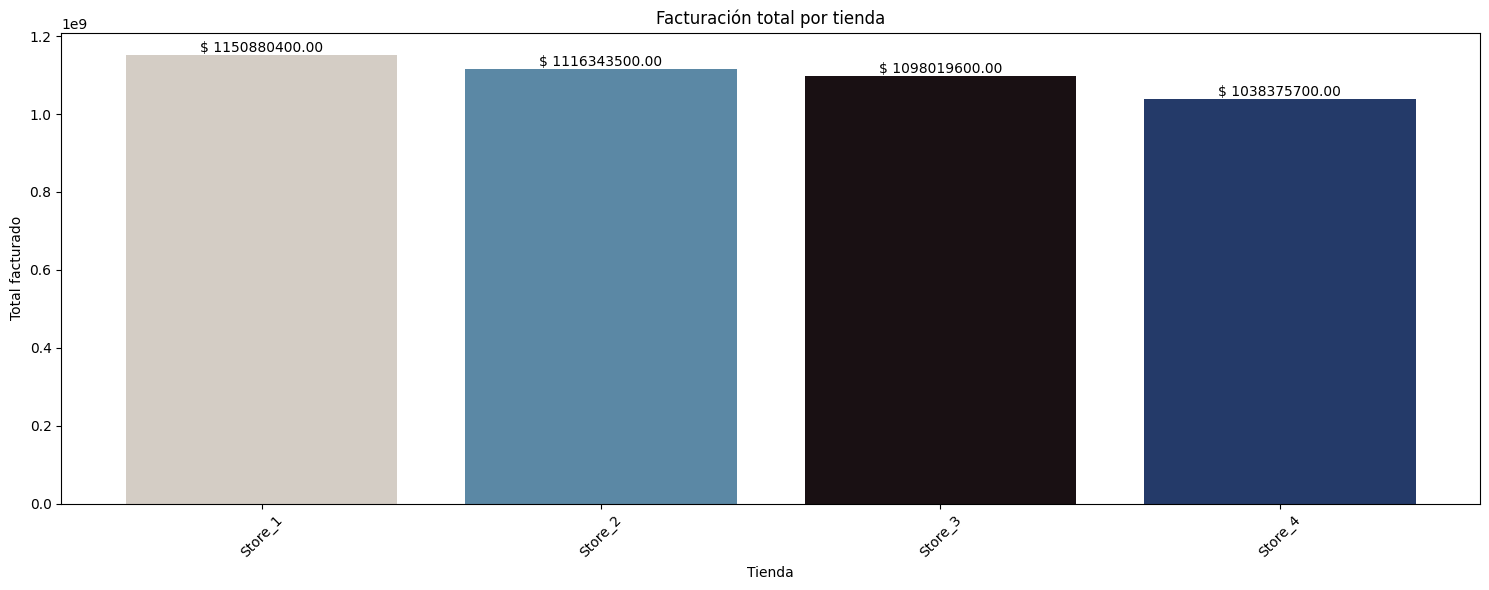

In [10]:
stores = {'Store_1': store_1, 'Store_2': store_2, 'Store_3': store_3, 'Store_4': store_4}

total_billing = {name: sum(df['Precio']) for name, df in stores.items()}
total_billing_df = pd.DataFrame(list(total_billing.items()), columns=['Tienda', 'Facturacion'])

plt.figure(figsize=(15, 6))

colors = ['#d4cdc5', '#5b88a5', '#191013', '#243a69']

bars = plt.bar(total_billing.keys(), total_billing.values(), color=colors)

plt.title('Facturación total por tienda')
plt.xlabel('Tienda')
plt.ylabel('Total facturado')
plt.xticks(rotation=45)

for bar in bars:
    bar_height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2, 
        bar_height + 1, 
        f'$ {bar_height:.2f}', 
        ha='center', 
        va='bottom', 
        fontsize=10
        )



print("Ingresos de las tiendas")
print(total_billing_df)

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

                         Store_1  Store_2  Store_3  Store_4
Categoría del Producto                                     
Artículos para el hogar      171      181      177      201
Deportes y diversión         284      275      277      277
Electrodomésticos            312      305      278      254
Electrónicos                 448      422      451      451
Instrumentos musicales       182      224      177      170
Juguetes                     324      313      315      338
Libros                       173      197      185      187
Muebles                      465      442      499      480


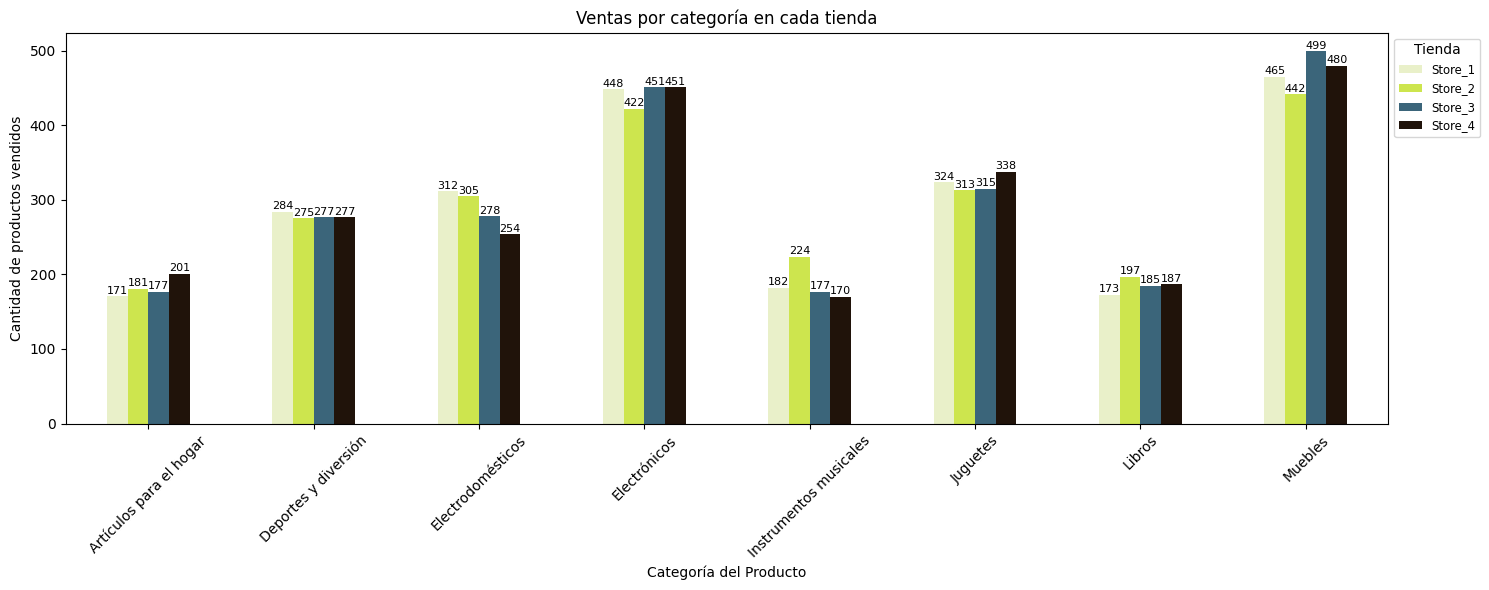

In [11]:
sales_by_category = {}
for name, df in stores.items():
    count = df['Categoría del Producto'].value_counts()
    sales_by_category[name] = count

sales_by_category_df = pd.DataFrame(sales_by_category)
sales_by_category_df = sales_by_category_df.fillna(0).astype(int)

colors=['#e9f0c9', '#cde54e', '#3b657a', '#20130a']

ax = sales_by_category_df.plot(kind='bar', figsize=(15, 6), color=colors)

plt.title('Ventas por categoría en cada tienda')
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad de productos vendidos')
plt.xticks(rotation=45)
plt.legend(title='Tienda', loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize='small', title_fontsize='medium')

print(sales_by_category_df)

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 0.5,
                str(int(height)),
                ha='center',
                va='bottom',
                fontsize=8
            )

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


Calificación por tienda. 
     Tienda  Calificación
0  Store_1      3.976685
1  Store_2      4.037304
2  Store_3      4.048326
3  Store_4      3.995759


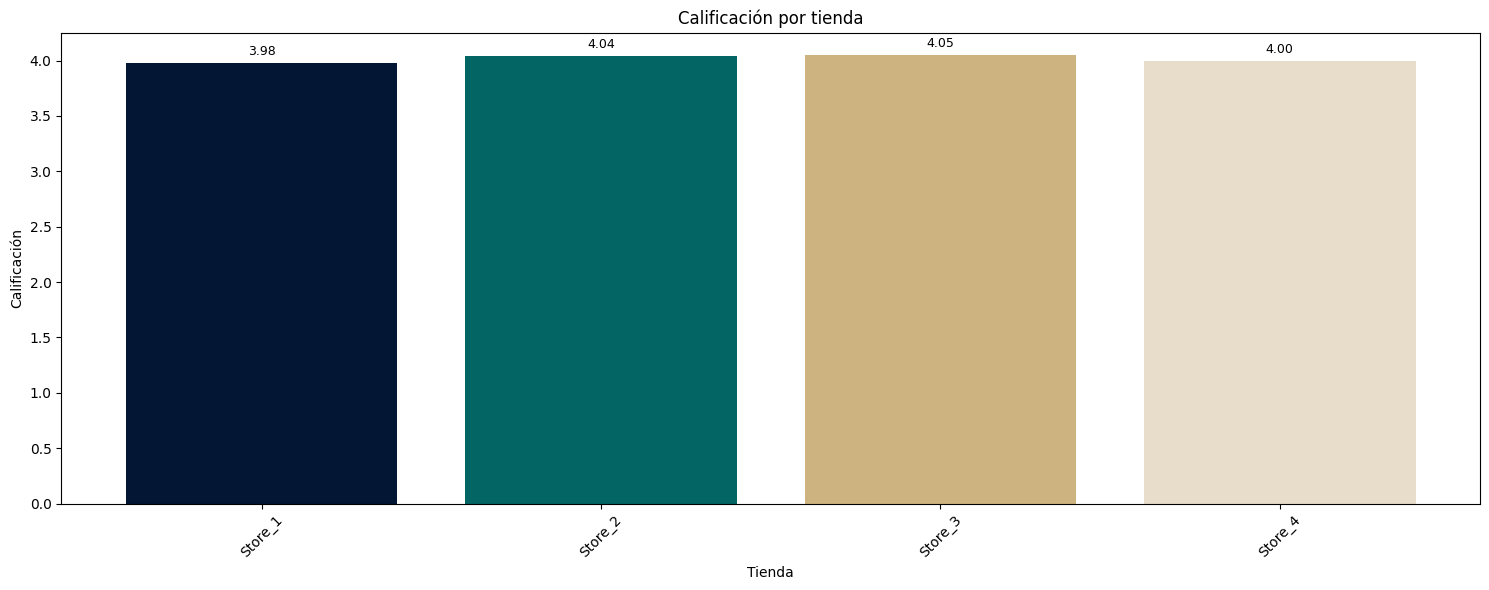

In [16]:
score_by_store = {name: df['Calificación'].mean() for name, df in stores.items()}
score_by_store_df = pd.DataFrame(list(score_by_store.items()), columns=['Tienda', 'Calificación'])

colors = ['#031634', '#036564', '#cdb380', '#e8ddcb']

plt.figure(figsize=(15, 6))
bars = plt.bar(score_by_store.keys(), score_by_store.values(), color=colors)

plt.title('Calificación por tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación')
plt.xticks(rotation=45)

for bar in bars:
    bar_height= bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar_height + 0.05, 
        f'{bar_height:.2f}', 
        ha='center',
        va='bottom',
        fontsize=9
    )

print(f'Calificación por tienda. \n {score_by_store_df}')

plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

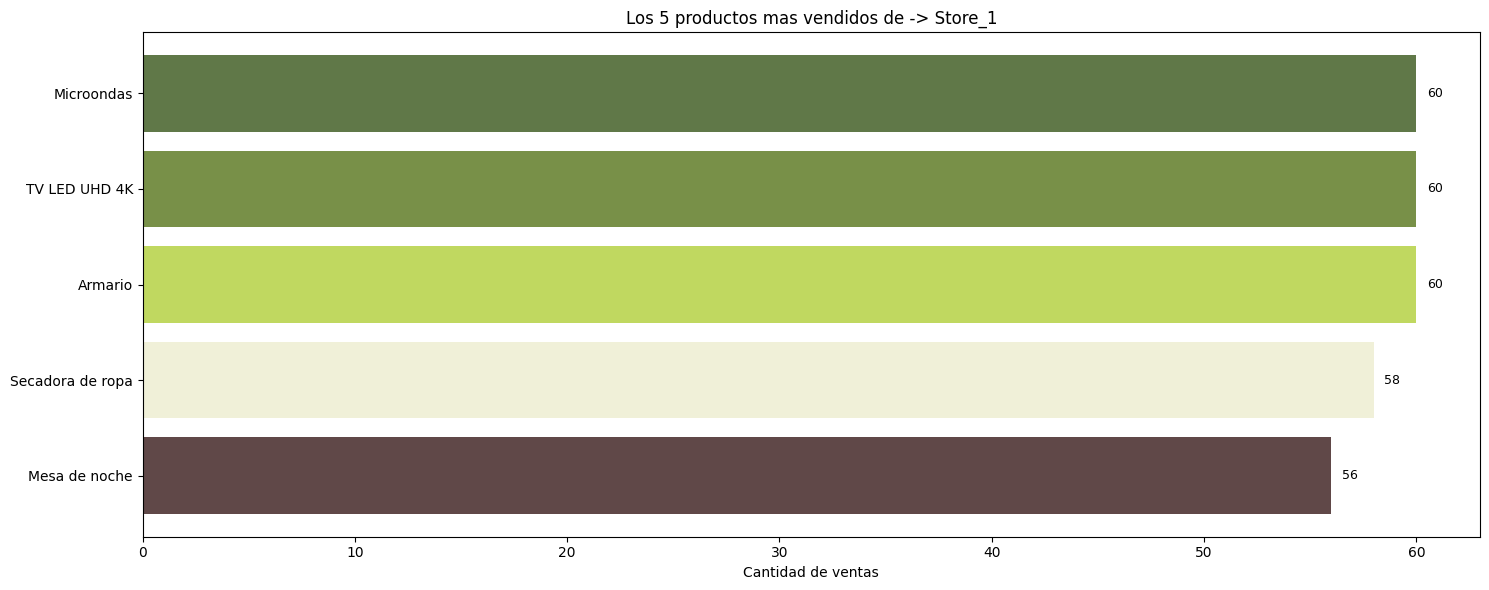

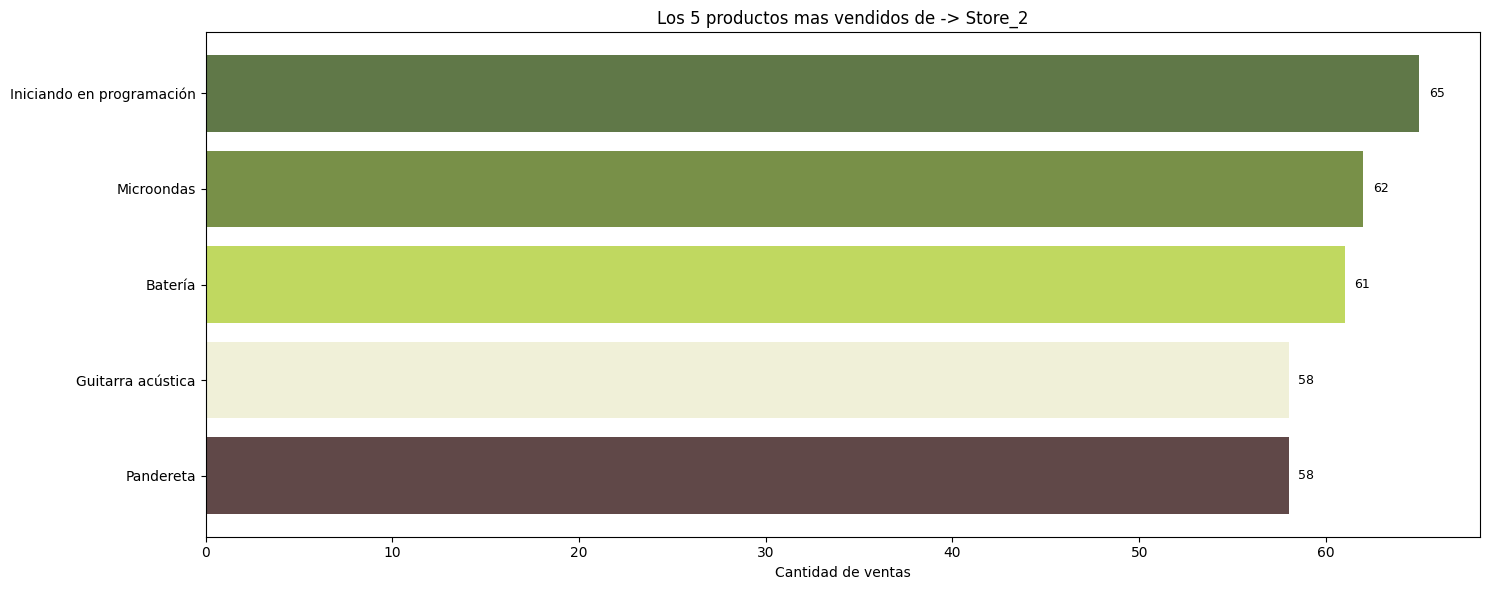

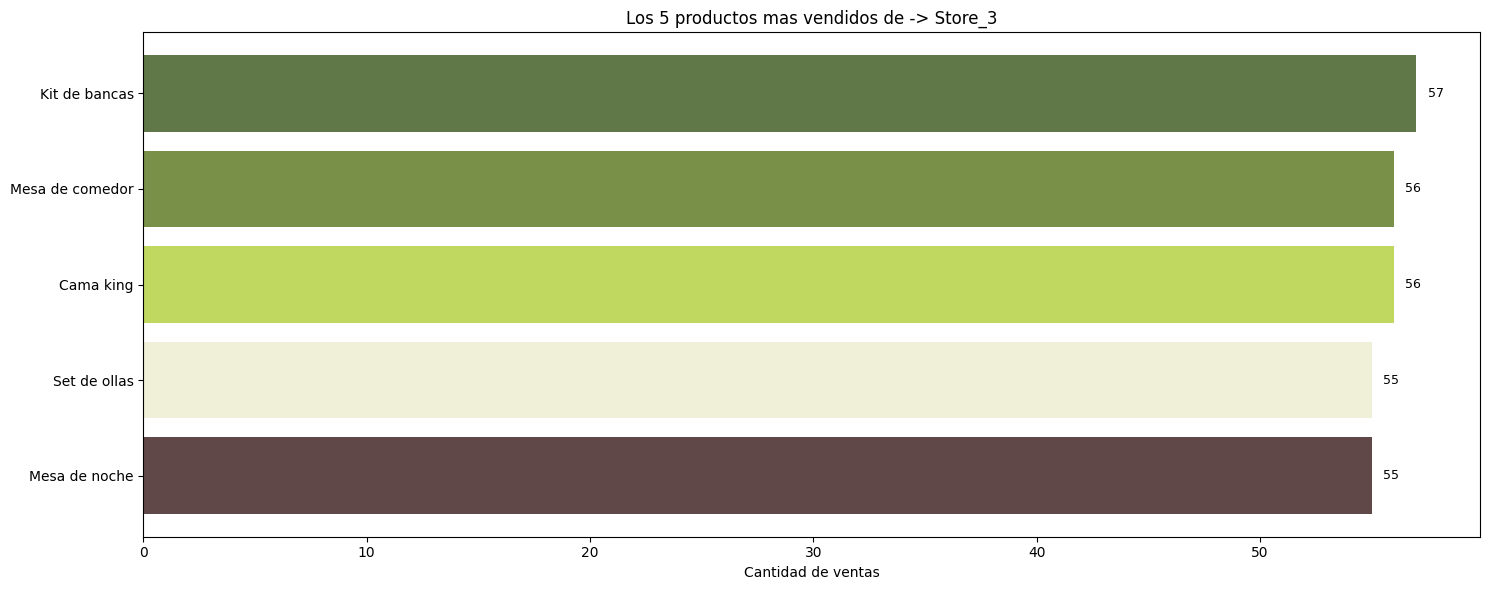

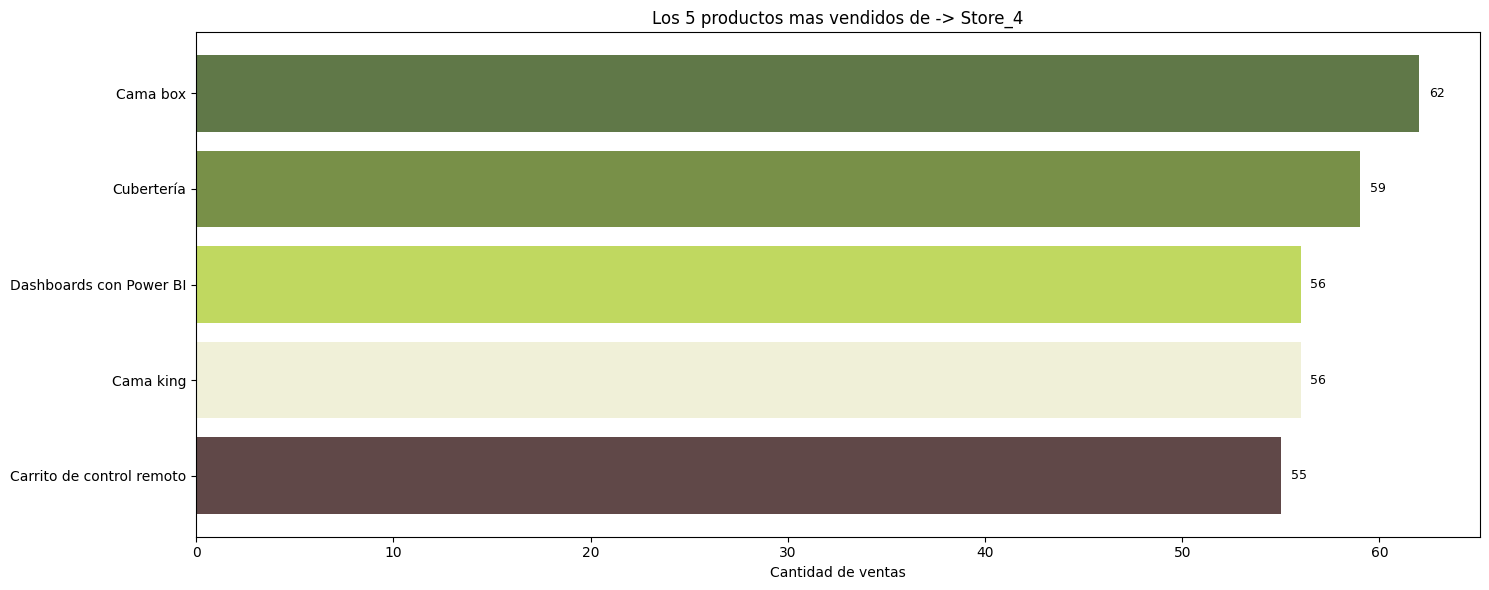

In [13]:
# Los 5 productos mas vendidos
most_5_sold = {name: df['Producto'].value_counts().head(5).iloc[::-1] for name, df in stores.items()}

for name, product in most_5_sold.items():
    plt.figure(figsize=(15, 6))
    
    colors = ['#604848', '#f0f0d8', '#c0d860', '#789048', '#607848']

    bars = plt.barh(product.index, product.values, color = colors)
    plt.title(f'Los 5 productos mas vendidos de -> {name}')
    plt.xlabel('Cantidad de ventas')

    for bar in bars:
        plt.text(
            bar.get_width() + 0.5, 
            bar.get_y() + bar.get_height()/2,
            str(int(bar.get_width())),
            va='center', 
            fontsize=9)

    plt.tight_layout()
    plt.show()


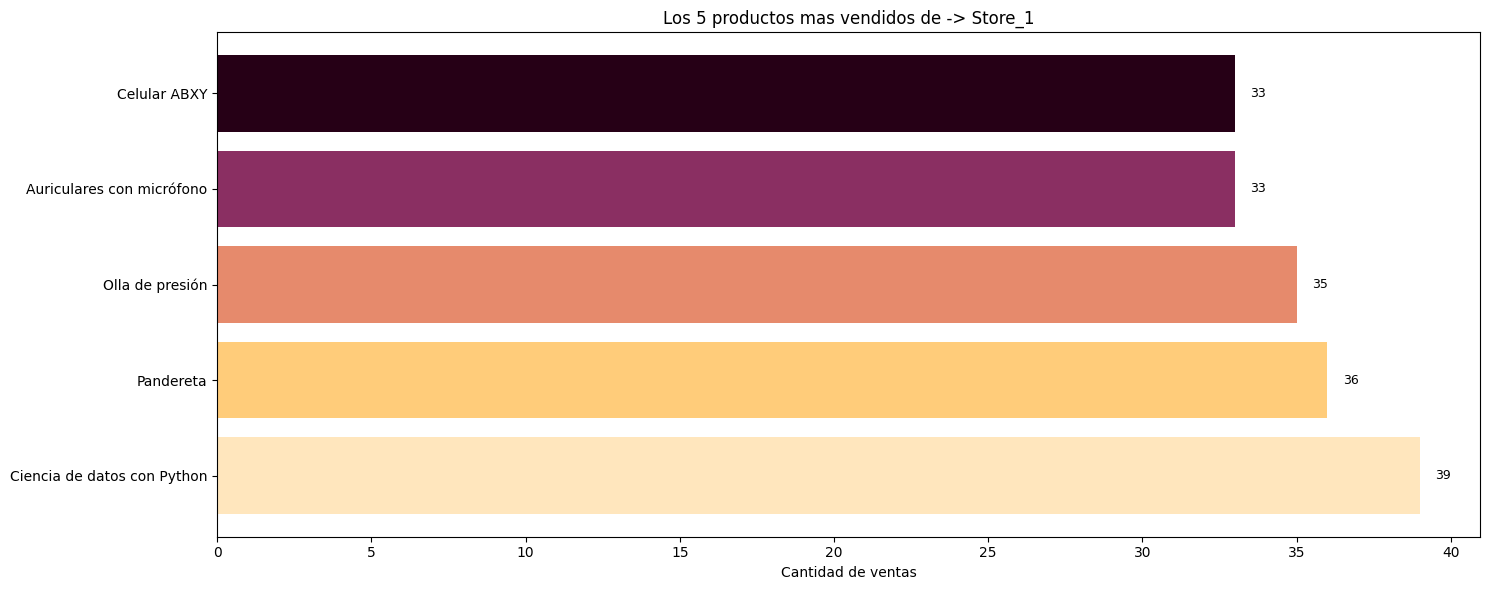

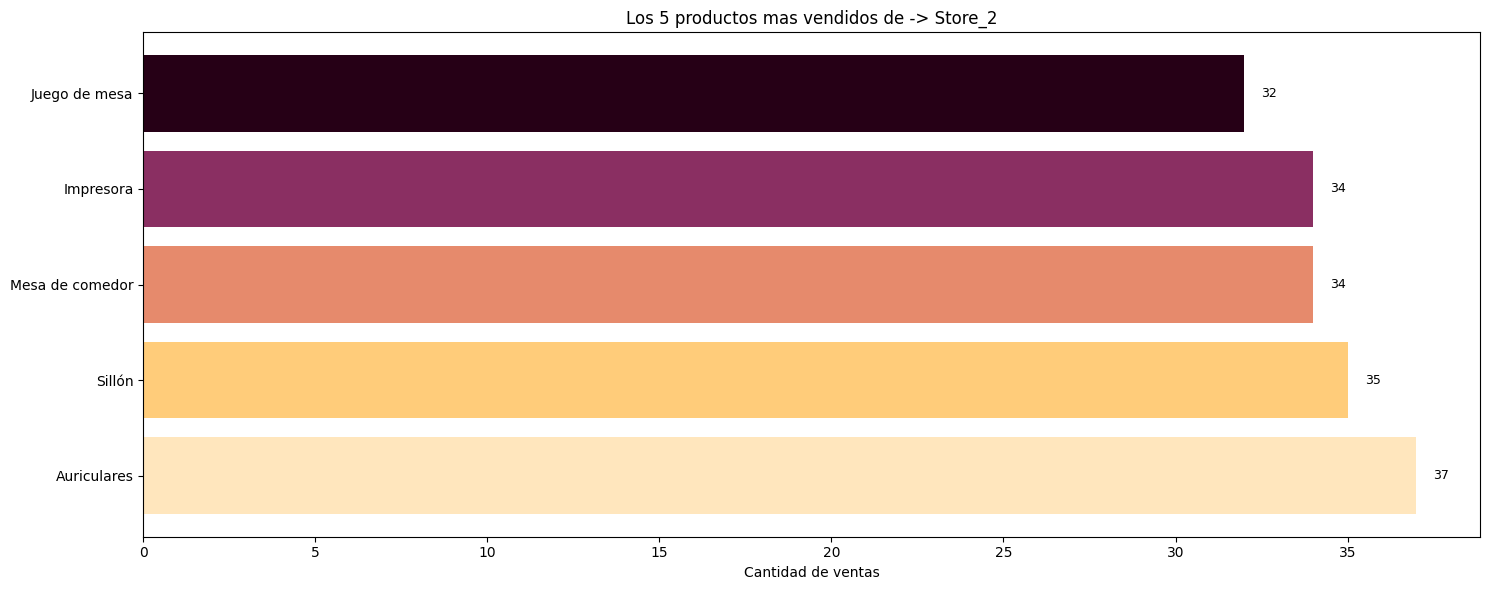

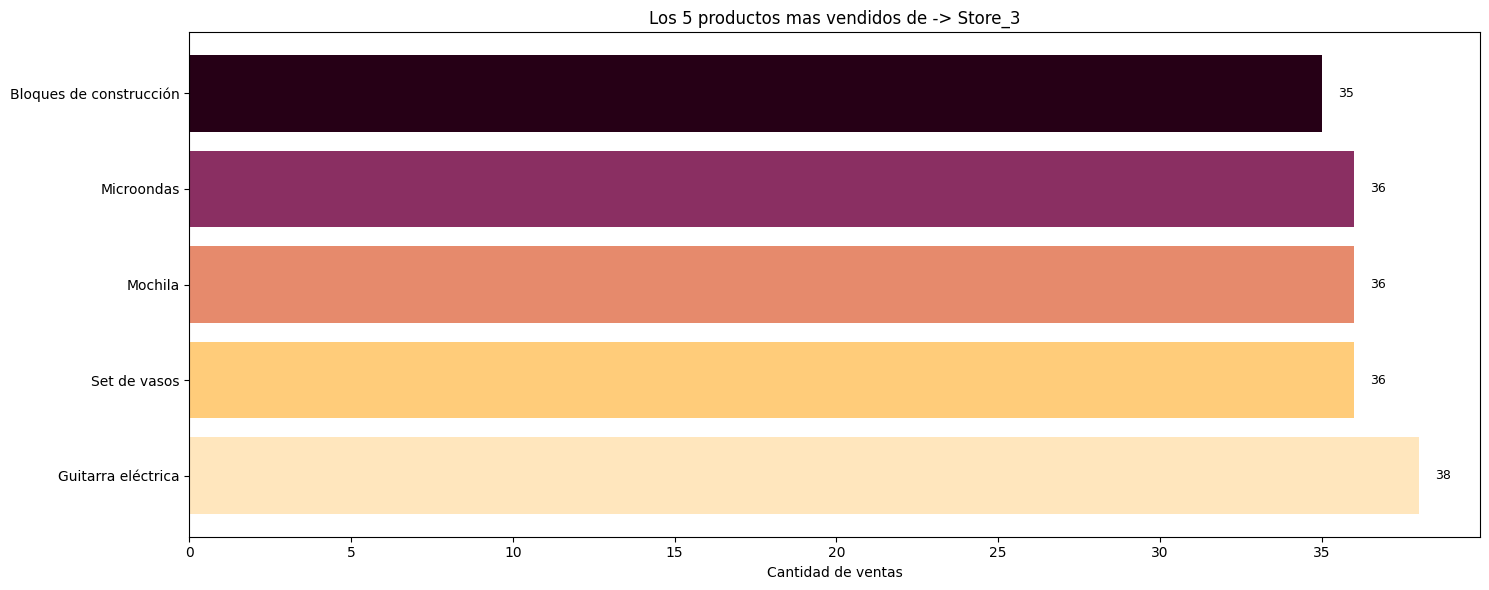

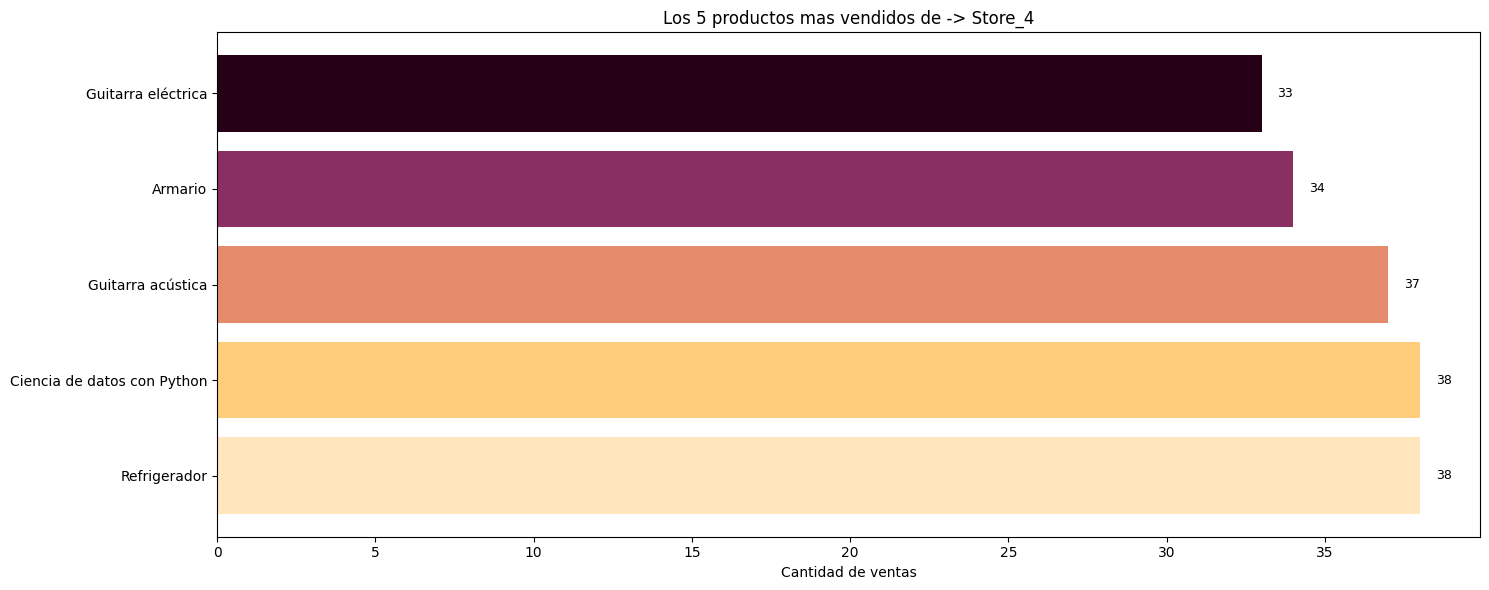

In [40]:
# Los 5 productos menos vendidos
least_5_sold = {name: df['Producto'].value_counts().tail(5) for name, df in stores.items()}

for name, product in least_5_sold.items():
    plt.figure(figsize=(15, 6))

    colors = ['#ffe6bd', '#ffcc7a', '#e68a6c', '#8a2f62', '#260016']

    bars = plt.barh(product.index, product.values, color = colors)
    plt.title(f'Los 5 productos mas vendidos de -> {name}')
    plt.xlabel('Cantidad de ventas')

    for bar in bars:
        plt.text(
            bar.get_width() + 0.5, 
            bar.get_y() + bar.get_height()/2,
            str(int(bar.get_width())),
            va='center', 
            fontsize=9)

    plt.tight_layout()
    plt.show()


# 5. Envío promedio por tienda

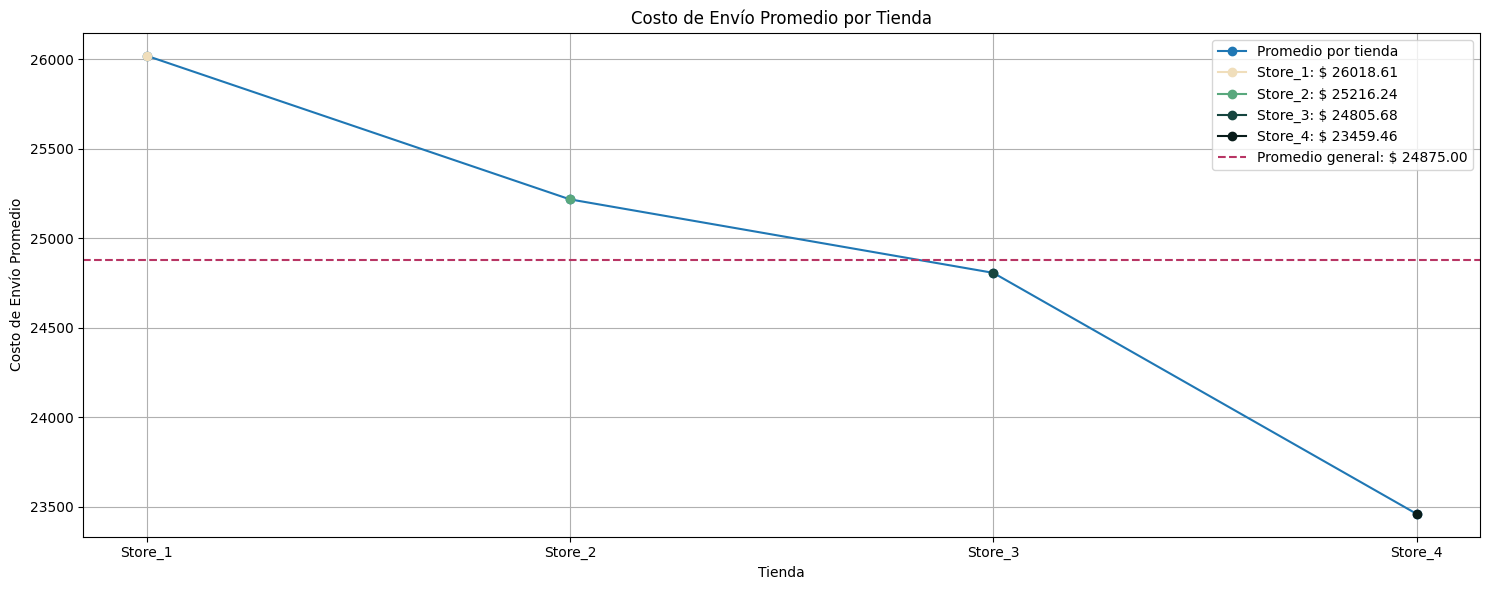

In [65]:
# Cálculo del costo de envío promedio por tienda usando comprensión de listas
avg_shipping = {name: df['Costo de envío'].mean() for name, df in stores.items()}

# Cálculo del promedio general
overall_avg = sum(avg_shipping.values()) / len(avg_shipping)

# Gráfico de líneas
plt.figure(figsize=(15, 6))
plt.plot(list(avg_shipping.keys()), list(avg_shipping.values()), marker='o', label='Promedio por tienda')

colors = ['#f0debb', '#59a87d', '#16453f', '#091c1a']

for i, (name, avg) in enumerate(avg_shipping.items()):
    plt.plot(name, avg, marker='o', color=colors[i], label=f'{name}: $ {avg:.2f}')

plt.axhline(y=overall_avg, color='#b83564', linestyle='--', label=f'Promedio general: $ {overall_avg:.2f}')

# Detalles del gráfico
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()